本次实验以AAAI 2014会议论文数据为基础，要求实现或调用无监督聚类算法，了解聚类方法。

### 任务介绍
每年国际上召开的大大小小学术会议不计其数，发表了非常多的论文。在计算机领域的一些大型学术会议上，一次就可以发表涉及各个方向的几百篇论文。按论文的主题、内容进行聚类，有助于人们高效地查找和获得所需要的论文。本案例数据来源于AAAI 2014上发表的约400篇文章，由[UCI](https://archive.ics.uci.edu/ml/datasets/AAAI+2014+Accepted+Papers!)公开提供，提供包括标题、作者、关键词、摘要在内的信息，希望大家能根据这些信息，合理地构造特征向量来表示这些论文，并设计实现或调用聚类算法对论文进行聚类。最后也可以对聚类结果进行观察，看每一类都是什么样的论文，是否有一些主题。

基本要求：
1. 将文本转化为向量，实现或调用无监督聚类算法，对论文聚类，例如10类（可使用已有工具包例如sklearn）；
2. 观察每一类中的论文，调整算法使结果较为合理；
3. 无监督聚类没有标签，效果较难评价，因此没有硬性指标，跑通即可，主要让大家了解和感受聚类算法，比较简单。

扩展要求：
1. 对文本向量进行降维，并将聚类结果可视化成散点图。

注：group和topic也不能完全算是标签，因为
1. 有些文章作者投稿时可能会选择某个group/topic但实际和另外group/topic也相关甚至更相关；
2. 一篇文章可能有多个group和topic，作为标签会出现有的文章同属多个类别，这里暂不考虑这样的聚类；
3. group和topic的取值很多，但聚类常常希望指定聚合成出例如5/10/20类；
4. 感兴趣但同学可以思考利用group和topic信息来量化评价无监督聚类结果，不作要求。

提示：
1. 高维向量的降维旨在去除一些高相关性的特征维度，保留最有用的信息，用更低维的向量表示高维数据，常用的方法有PCA和t-SNE等；
2. 降维与聚类是两件不同的事情，聚类实际上在降维前的高维向量和降维后的低维向量上都可以进行，结果也可能截然不同；
3. 高维向量做聚类，降维可视化后若有同一类的点不在一起，是正常的。在高维空间中它们可能是在一起的，降维后损失了一些信息。

### 导入并处理数据

In [5]:
import pandas as pd 
import numpy as np 

df = pd.read_csv(r'../AAAI 会议论文聚类分析/data/[UCI] AAAI-14 Accepted Papers - Papers.csv')
df.info()

# 数据有空值, 尝试将空值去掉

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     398 non-null    object
 1   authors   398 non-null    object
 2   groups    396 non-null    object
 3   keywords  398 non-null    object
 4   topics    394 non-null    object
 5   abstract  398 non-null    object
dtypes: object(6)
memory usage: 18.8+ KB


In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     392 non-null    object
 1   authors   392 non-null    object
 2   groups    392 non-null    object
 3   keywords  392 non-null    object
 4   topics    392 non-null    object
 5   abstract  392 non-null    object
dtypes: object(6)
memory usage: 21.4+ KB


group和topic也不能完全算是标签
1. 有些文章作者投稿时可能会选择某个group/topic但实际和另外group/topic也相关甚至更相关
2. 一篇文章可能有多个group和topic，作为标签会出现有的文章同属多个类别，这里暂不考虑这样的聚类
3. group和topic的取值很多，但聚类常常希望指定聚合成出例如5/10/20类

--> 利用group和topic信息来量化评价无监督聚类结果

In [7]:
drop_list = ['groups', 'topics']

df_feature = df.drop(drop_list , axis = 1)
df_feature.shape

(392, 4)

#### 将文本转化为向量

In [8]:
# 此次作业属于是文档分类任务
# 尝试使用BOW 或 TF-IDF模型

##### BOW 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np  

cv = CountVectorizer()

# 初始化一个空的列表来存储所有特征的词袋表示
feature_list = []

X = np.empty((0 , 392))
for col in df_feature.columns:
    BOW = cv.fit_transform(df_feature[col])
    feature = BOW.toarray()
    print(feature.shape)

    # 将当前特征的词袋表示添加到列表中
    feature_list.append(feature)  
    
X_BOW = np.concatenate(feature_list, axis=1)    
    
    
print(X_BOW.shape)

print(cv.vocabulary_)
print('---------------------------------')
print(BOW)
print('---------------------------------')
print(BOW.toarray())

(392, 1322)
(392, 1582)
(392, 1225)
(392, 5769)
(392, 9898)
{'transfer': 5351, 'learning': 2943, 'considers': 1104, 'related': 4334, 'but': 685, 'distinct': 1598, 'tasks': 5185, 'defined': 1377, 'on': 3541, 'heterogenous': 2417, 'domains': 1635, 'and': 294, 'tries': 5391, 'to': 5297, 'knowledge': 2882, 'between': 573, 'these': 5260, 'improve': 2567, 'generalization': 2260, 'performance': 3780, 'it': 2828, 'is': 2820, 'particularly': 3714, 'useful': 5537, 'when': 5685, 'we': 5664, 'do': 1627, 'not': 3468, 'have': 2392, 'sufficient': 5080, 'amount': 276, 'of': 3526, 'labeled': 2893, 'training': 5342, 'data': 1315, 'in': 2575, 'some': 4864, 'which': 5691, 'may': 3167, 'be': 525, 'very': 5602, 'costly': 1232, 'laborious': 2899, 'or': 3590, 'even': 1899, 'infeasible': 2648, 'obtain': 3508, 'instead': 2712, 'the': 5244, 'jointly': 2846, 'enables': 1797, 'us': 5531, 'effectively': 1721, 'increase': 2599, 'this': 5265, 'paper': 3681, 'formulate': 2174, 'kernelized': 2864, 'bayesian': 523, 'fra

##### TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np  

tfidf_vectorizer = TfidfVectorizer()

tfidf_feature_list = []

X = np.empty((0 , 392))
for col in df_feature.columns:
    tfidf_matrix = tfidf_vectorizer.fit_transform(df_feature[col])
    tfidf_feature = tfidf_matrix.toarray()
    print(tfidf_feature.shape)

    tfidf_feature_list.append(tfidf_feature)  
    
X_TF = np.concatenate(tfidf_feature_list, axis=1)    
    
print(X_TF.shape)
print('---------------------------------')
print(tfidf_vectorizer.vocabulary_)
print('---------------------------------')
print(tfidf_matrix)
print('---------------------------------')
print(tfidf_matrix.toarray())

(392, 1322)
(392, 1582)
(392, 1225)
(392, 5769)
(392, 9898)
---------------------------------
{'transfer': 5351, 'learning': 2943, 'considers': 1104, 'related': 4334, 'but': 685, 'distinct': 1598, 'tasks': 5185, 'defined': 1377, 'on': 3541, 'heterogenous': 2417, 'domains': 1635, 'and': 294, 'tries': 5391, 'to': 5297, 'knowledge': 2882, 'between': 573, 'these': 5260, 'improve': 2567, 'generalization': 2260, 'performance': 3780, 'it': 2828, 'is': 2820, 'particularly': 3714, 'useful': 5537, 'when': 5685, 'we': 5664, 'do': 1627, 'not': 3468, 'have': 2392, 'sufficient': 5080, 'amount': 276, 'of': 3526, 'labeled': 2893, 'training': 5342, 'data': 1315, 'in': 2575, 'some': 4864, 'which': 5691, 'may': 3167, 'be': 525, 'very': 5602, 'costly': 1232, 'laborious': 2899, 'or': 3590, 'even': 1899, 'infeasible': 2648, 'obtain': 3508, 'instead': 2712, 'the': 5244, 'jointly': 2846, 'enables': 1797, 'us': 5531, 'effectively': 1721, 'increase': 2599, 'this': 5265, 'paper': 3681, 'formulate': 2174, 'kernel

#### 聚类评估

使用BOW模型处理过的特征进行分析

##### 轮廓系数（Silhouette Score）

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
os.environ["OMP_NUM_THREADS"] = "2"

best_silhouette_score = float('-inf')
best_clusters = None

for i in range(2,16):
    n_clusters = i
    # 使用 KMeans 进行聚类
    kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state = 0)
    clusters = kmeans.fit_predict(X_BOW)
    
    # 计算轮廓系数
    silhouette_avg = silhouette_score(X_BOW, clusters)
    
    print(f"clusters = {i}")
    print(f"The average silhouette score is: {silhouette_avg}")
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_clusters = clusters    

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 2
The average silhouette score is: 0.08652928281371287


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 3
The average silhouette score is: 0.049218524000350594


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 4
The average silhouette score is: 0.018465769714196806


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 5
The average silhouette score is: 0.013171389579636063


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 6
The average silhouette score is: 0.02768707463351673


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 7
The average silhouette score is: 0.01691364264647679


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 8
The average silhouette score is: 0.005546701051893581


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 9
The average silhouette score is: -0.010053157176536303


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 10
The average silhouette score is: 0.0029780351352874978


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 11
The average silhouette score is: -0.0030510707934884884


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 12
The average silhouette score is: -0.008488724360374013


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 13
The average silhouette score is: 0.007304256662207145


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 14
The average silhouette score is: -0.013779953946644108


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clusters = 15
The average silhouette score is: -0.005738945536219397


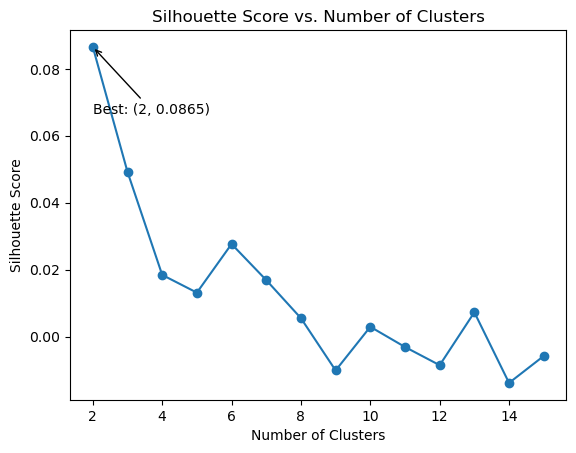

In [12]:
import matplotlib.pyplot as plt

cluster_numbers = list(range(2, 16))
silhouette_scores = [
    0.08652928281371287, 0.049218524000350594, 0.018465769714196806,
    0.013171389579636063, 0.02768707463351673, 0.01691364264647679,
    0.005546701051893581, -0.010053157176536303, 0.0029780351352874978,
    -0.0030510707934884884, -0.008488724360374013, 0.007304256662207145,
    -0.013779953946644108, -0.005738945536219397
]

# 找到最高轮廓系数对应的聚类数目
best_cluster_number = cluster_numbers[silhouette_scores.index(max(silhouette_scores))]

plt.plot(cluster_numbers, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.annotate(f'Best: ({best_cluster_number}, {max(silhouette_scores):.4f})',
             xy = (best_cluster_number, max(silhouette_scores)),
             xytext = (best_cluster_number, max(silhouette_scores) - 0.02),
             arrowprops = dict(arrowstyle='->'))

plt.show()

* 当聚类数目为2时，轮廓系数为0.0865，这是所有聚类数目中最高的
* 2个簇的聚类效果相对较好
* 随着聚类数目的增加，轮廓系数逐渐降低，在这个数据集上增加聚类的数量并不一定会导致更好的聚类效果

###### t-sne降为到二维并可视化

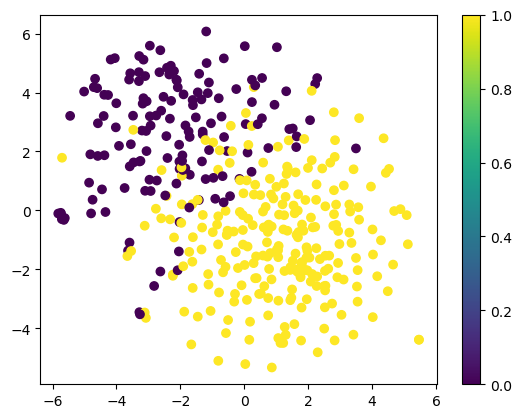

(392, 2)


In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components = 2, random_state = 0)
X_tsne = tsne.fit_transform(X_BOW)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = best_clusters, cmap = 'viridis')
plt.colorbar()
plt.show()
print(X_tsne.shape)

###### t-sne降为到三维并可视化

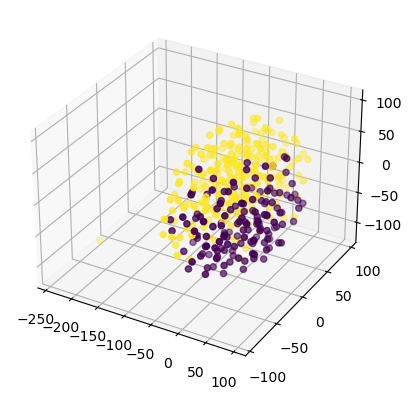

(392, 3)


In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

tsne = TSNE(n_components = 3, random_state = 42)
X_tsne = tsne.fit_transform(X_BOW)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c = best_clusters, cmap = 'viridis')

plt.show()
print(X_tsne.shape)

###### PCA降为到二维并可视化

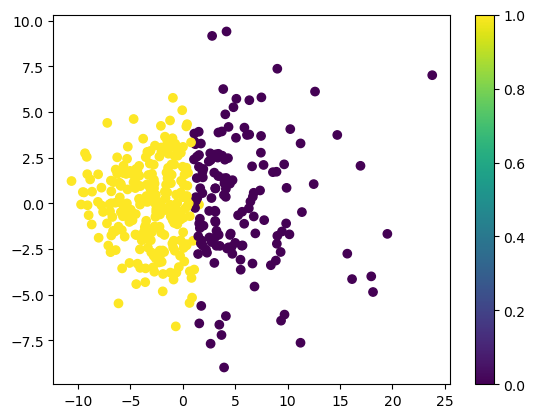

(392, 2)


In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2 ,random_state = 42)
X_pca = pca.fit_transform(X_BOW)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = best_clusters, cmap='viridis')
plt.colorbar()
plt.show()
print(X_pca.shape)

###### PCA降为到三维并可视化

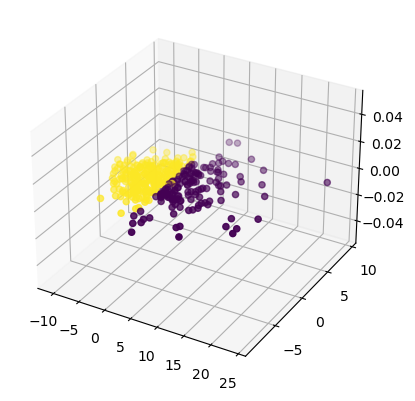

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], c = best_clusters, cmap = 'viridis')

plt.show()

##### Calinski-Harabasz指数

* 通过簇内的协方差矩阵与簇间的协方差矩阵的比值来度量聚类的紧密度和分离度
* 指数值越大表示聚类效果越好

In [32]:
from sklearn.metrics import calinski_harabasz_score

best_calinski_harabasz = float('-inf')
best_clusters = None

for i in range(2, 16):
    n_clusters = i

    kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state = 0)
    clusters = kmeans.fit_predict(X_BOW)
    
    calinski_harabasz_score_value = calinski_harabasz_score(X_BOW, clusters)
    
    print(f"Clusters = {n_clusters}, Calinski-Harabasz Score = {calinski_harabasz_score_value}")
    
    # 保存最好的聚类结果
    if calinski_harabasz_score_value > best_calinski_harabasz:
        best_calinski_harabasz = calinski_harabasz_score_value
        best_clusters = clusters

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 2, Calinski-Harabasz Score = 26.273254022955786


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 3, Calinski-Harabasz Score = 17.517625239186195


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 4, Calinski-Harabasz Score = 13.139067750006278


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 5, Calinski-Harabasz Score = 10.59248325230554


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 6, Calinski-Harabasz Score = 9.593558375069403


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 7, Calinski-Harabasz Score = 8.092872804244442


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 8, Calinski-Harabasz Score = 7.347366744009037


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 9, Calinski-Harabasz Score = 6.7637127435503865


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 10, Calinski-Harabasz Score = 6.4542080988438775


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 11, Calinski-Harabasz Score = 5.793421418014581


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 12, Calinski-Harabasz Score = 5.534943745448016


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 13, Calinski-Harabasz Score = 5.540393599400531


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 14, Calinski-Harabasz Score = 5.146934087389454


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters = 15, Calinski-Harabasz Score = 4.928092444018501


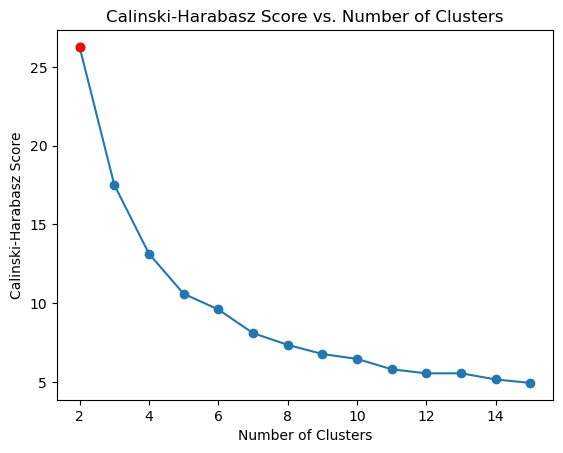

In [38]:
import matplotlib.pyplot as plt

clusters = list(range(2,16))
ch_scores = [26.273254022955786, 17.517625239186195, 13.139067750006278, 
             10.59248325230554, 9.593558375069403, 8.092872804244442, 
             7.347366744009037, 6.7637127435503865, 6.4542080988438775, 
             5.793421418014581, 5.534943745448016, 5.540393599400531, 
             5.146934087389454, 4.928092444018501]

plt.plot(clusters, ch_scores, marker='o')

max_ch_score = max(ch_scores)
max_ch_index = ch_scores.index(max_ch_score)
plt.plot(clusters[max_ch_index], max_ch_score, 'ro')

plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs. Number of Clusters')

plt.show()

###### t-sne降维二维

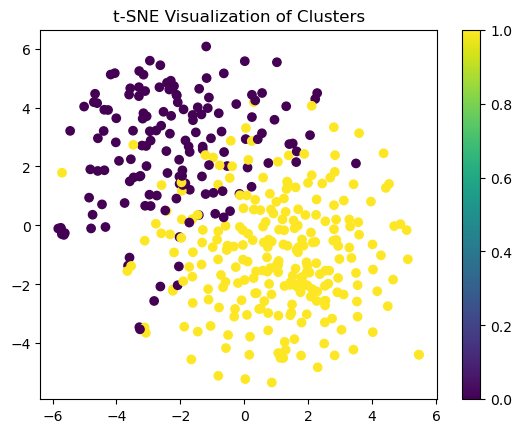

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_BOW)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=best_clusters, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Clusters')
plt.show()

###### t-snePCA降维三维

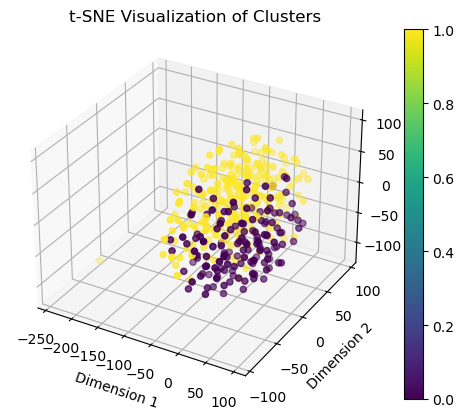

In [37]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

tsne = TSNE(n_components = 3, random_state = 42)
X_tsne = tsne.fit_transform(X_BOW)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c = best_clusters, cmap = 'viridis')

plt.colorbar(scatter)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.title('t-SNE Visualization of Clusters')
plt.show()

###### PCA降维二维

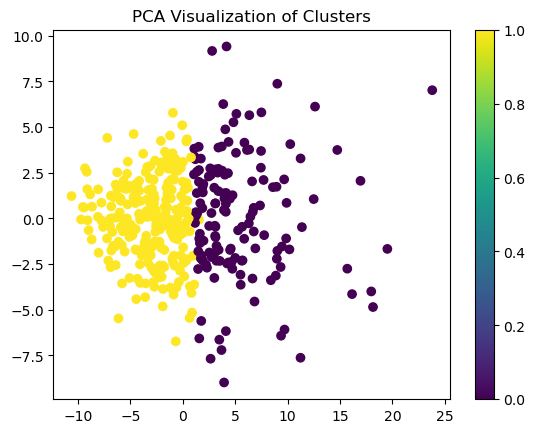

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 使用PCA降维二维
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_BOW)

# 绘制散点图
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = best_clusters, cmap = 'viridis')
plt.colorbar()
plt.title('PCA Visualization of Clusters')
plt.show()

###### PCA降维三维

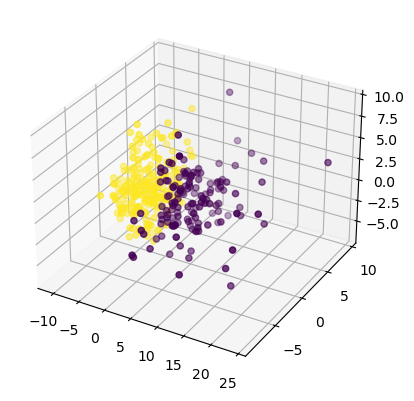

In [34]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_BOW)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = best_clusters, cmap = 'viridis')

plt.show()


#### Elbow Method

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


2 101815.57511972392


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


3 99695.54677415991


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


4 98652.44358437124


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


5 97950.6800080524


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


6 96662.47837113163


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


7 96503.35440119595


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


8 95838.3732461085


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


9 95221.81333049155


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


10 94330.48803175065


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


11 94330.8310711691


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


12 93667.084507378


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


13 92455.87520778725


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


14 92331.0155789818


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


15 91863.1093137687


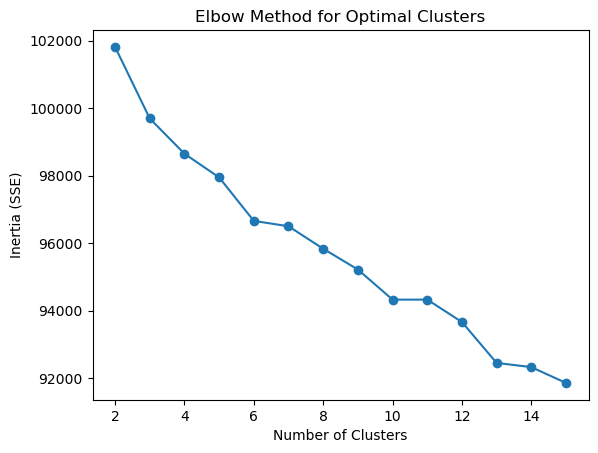

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "2"

clusters = range(2, 16)
inertia_values = []

for k in clusters:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state=0)
    kmeans.fit(X_BOW)
    inertia_values.append(kmeans.inertia_)
    print(k ,kmeans.inertia_)
    
plt.plot(clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

* 没有明显的拐点